im_shape: (2140, 96, 96)
landmarks_shape: (2140, 15, 2)


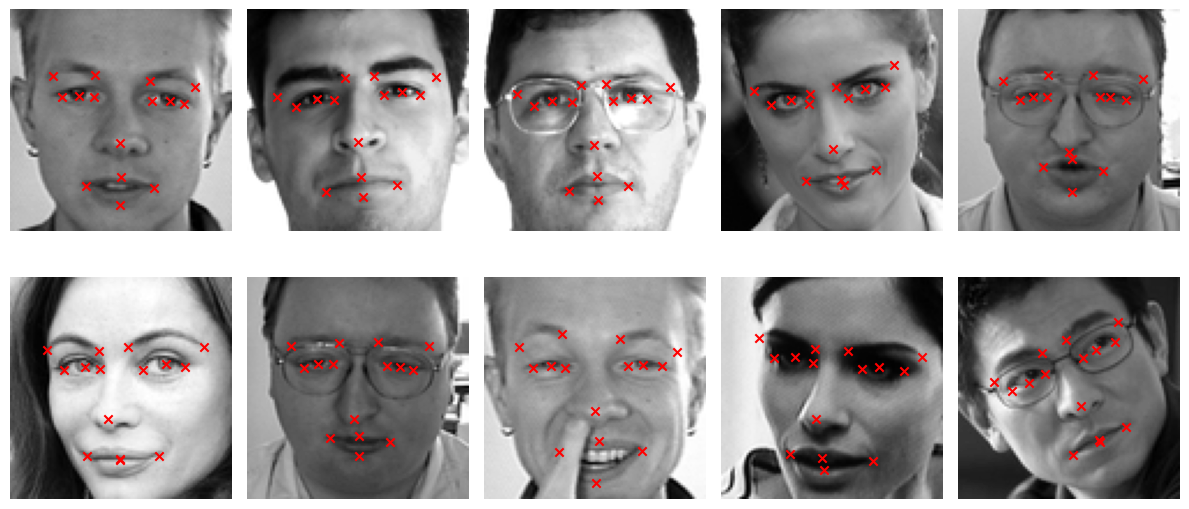

In [59]:
import scipy.io as io
import numpy as np
from matplotlib import pyplot as plt

# load the data
data = io.loadmat("C:/Users/pc/Downloads/face_landmark.mat")
images = data["images"]
landmarks = data["landmarks"]
print("im_shape:", images.shape)
print("landmarks_shape:", landmarks.shape)

# visualize a random data

np.random.seed(101)
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(images))
    img = images[index]
    keypoints = landmarks[index]
    
    ax.imshow(img, cmap='gray')
    ax.scatter(keypoints[:, 0], keypoints[:, 1], c='r', marker='x')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [2]:
images.shape

(2140, 96, 96)

In [3]:
landmarks.shape  # image 당15개의 landmark

(2140, 15, 2)

In [7]:
mean = np.mean(images)
mean

121.06315

In [8]:
std = np.std(images)
std

59.070286

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms.functional as TF
import random

class ImageDataset(Dataset):
    def __init__(self, images, landmarks):
        self.images = images
        self.landmarks = landmarks
        
    def flip_along_y(self, points):
        points[:, 0] = 95 - points[:, 0]
    
    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = TF.to_tensor(self.images[index]).clone()
        image = TF.normalize(image, 121.06315, 59.070286)
        landmark = torch.tensor(self.landmarks[index])
        
        # random flip
        r = random.random()  # 0 ~ 1
        if r >  0.5:  # flip
            image = TF.hflip(image)
            self.flip_along_y(landmark)
    
        return image, landmark